# Support Vector Machine
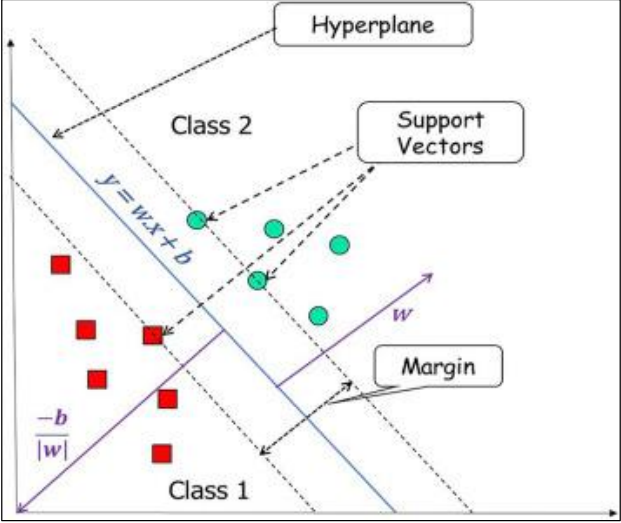

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
# Read Dataset 
import pandas as pd
df = pd.read_csv('iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [5]:
df.duplicated().sum()

1

## Seperate X and Y Feature

In [6]:
X = df.drop(columns=['species'])
Y = df[['species']]

In [7]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
Y.head()

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


## Apply Preprocessing on X feature

In [9]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


In [10]:
num_pipe = Pipeline(steps=[('impute',SimpleImputer(strategy='mean')),
                           ('scaler',StandardScaler())]).set_output(transform='pandas')

In [11]:
X_pre = num_pipe.fit_transform(X)
X_pre[0:5]

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [12]:
cols = num_pipe.get_feature_names_out()
cols

array(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],
      dtype=object)

### Train Test Split

In [13]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.33, random_state=42)

In [14]:
xtrain.shape

(100, 4)

In [15]:
xtest.shape

(50, 4)

## Create SVM Model

In [16]:
from sklearn.svm import SVC
model = SVC(probability=True)
model.fit(xtrain, ytrain)

SVC(probability=True)

In [17]:
model.score(xtrain, ytrain)

0.97

In [18]:
model.score(xtest, ytest)

0.98

### Predict the results for train and test

In [19]:
ypred_tr = model.predict(xtrain)
ypred_ts = model.predict(xtest)

In [20]:
ypred_tr[0:5]

array(['versicolor', 'virginica', 'versicolor', 'setosa', 'virginica'],
      dtype=object)

In [21]:
ytrain.head()

,species
96,versicolor
105,virginica
66,versicolor
0,setosa
122,virginica


In [22]:
ypred_ts[0:5]

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor'],
      dtype=object)

In [23]:
ytest.head()

,species
73,versicolor
18,setosa
118,virginica
78,versicolor
76,versicolor


## Create a confusion Matrix for Test Data

In [24]:
c = model.classes_
c

array(['setosa', 'versicolor', 'virginica'], dtype=object)

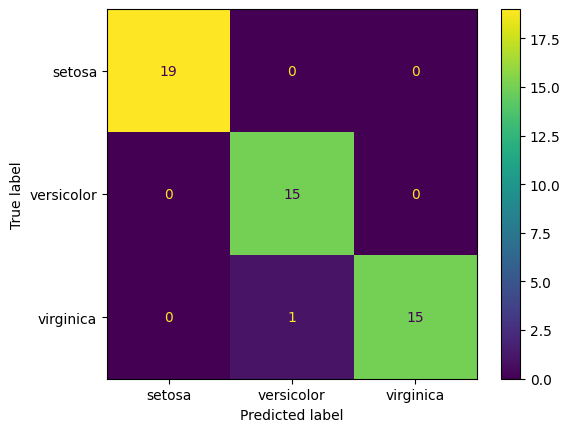

In [25]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf = confusion_matrix(ytest, ypred_ts)
cfd = ConfusionMatrixDisplay(cf, display_labels=c)
cfd.plot()

### Print the Classification Report

In [26]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_ts))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       0.94      1.00      0.97        15
   virginica       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



## using svm predic out of sample Data

In [27]:
xnew = pd.read_csv('iris_sample.csv')
xnew

,sepal_length,sepal_width,petal_length,petal_width
0,5.5,2.5,4.0,1.3
1,6.9,3.1,5.1,2.3
2,5.1,2.5,3.0,1.1
3,4.4,2.9,NaN,0.2
4,5.9,3.0,5.1,1.8
5,5.5,3.5,1.3,0.2
6,5.6,NaN,3.6,1.3
7,6.5,3.0,5.2,2.0
8,5.3,3.7,1.5,0.2
9,5.1,3.4,1.5,NaN


In [28]:
xnew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  15 non-null     float64
 1   sepal_width   14 non-null     float64
 2   petal_length  14 non-null     float64
 3   petal_width   14 non-null     float64
dtypes: float64(4)
memory usage: 612.0 bytes


In [29]:
xnew.isna().sum()

sepal_length    0
sepal_width     1
petal_length    1
petal_width     1
dtype: int64

In [30]:
xnew.duplicated().sum()

0

In [31]:
xnew_pre = num_pipe.transform(xnew)
xnew_pre

,sepal_length,sepal_width,petal_length,petal_width
0,-0.416010,-1.282963,0.137547,0.132510
1,1.280340,0.098217,0.762758,1.448832
2,-0.900681,-1.282963,-0.430828,-0.130755
3,-1.748856,-0.362176,0.000000,-1.315444
4,0.068662,-0.131979,0.762758,0.790671
5,-0.416010,1.019004,-1.397064,-1.315444
6,-0.294842,0.000000,-0.089803,0.132510
7,0.795669,-0.131979,0.819596,1.053935
8,-0.658345,1.479398,-1.283389,-1.315444
9,-0.900681,0.788808,-1.283389,0.000000


In [32]:
preds = model.predict(xnew_pre)
preds

array(['versicolor', 'virginica', 'versicolor', 'setosa', 'virginica',
       'setosa', 'versicolor', 'virginica', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'versicolor',
       'versicolor'], dtype=object)

In [33]:
probs = model.predict_proba(xnew_pre)
probs

array([[0.00776193, 0.95668266, 0.03555541],
       [0.01190429, 0.02287985, 0.96521586],
       [0.03272747, 0.94703403, 0.02023851],
       [0.62305383, 0.28799153, 0.08895464],
       [0.01342421, 0.20790263, 0.77867316],
       [0.95625684, 0.0235284 , 0.02021476],
       [0.04582465, 0.93859802, 0.01557733],
       [0.01025379, 0.04232771, 0.9474185 ],
       [0.96114689, 0.02119769, 0.01765543],
       [0.80437925, 0.13742671, 0.05819404],
       [0.01244535, 0.97512875, 0.01242591],
       [0.01289682, 0.9757876 , 0.01131558],
       [0.01735504, 0.02226778, 0.96037718],
       [0.01841682, 0.70869707, 0.27288611],
       [0.01970644, 0.55133005, 0.42896351]])

In [34]:
import numpy as np 
max_probs = np.max(probs, axis=1)
max_probs

array([0.95668266, 0.96521586, 0.94703403, 0.62305383, 0.77867316,
       0.95625684, 0.93859802, 0.9474185 , 0.96114689, 0.80437925,
       0.97512875, 0.9757876 , 0.96037718, 0.70869707, 0.55133005])

### save above in xnew

In [36]:
xnew['species_preds'] = preds
xnew['species_probs'] = max_probs

In [37]:
xnew

,sepal_length,sepal_width,petal_length,petal_width,species_preds,species_probs
0,5.5,2.5,4.0,1.3,versicolor,0.956683
1,6.9,3.1,5.1,2.3,virginica,0.965216
2,5.1,2.5,3.0,1.1,versicolor,0.947034
3,4.4,2.9,NaN,0.2,setosa,0.623054
4,5.9,3.0,5.1,1.8,virginica,0.778673
5,5.5,3.5,1.3,0.2,setosa,0.956257
6,5.6,NaN,3.6,1.3,versicolor,0.938598
7,6.5,3.0,5.2,2.0,virginica,0.947418
8,5.3,3.7,1.5,0.2,setosa,0.961147
9,5.1,3.4,1.5,NaN,setosa,0.804379


### save above file to csv

In [38]:
xnew.to_csv('SVMresults.csv', index=False)